In [1]:
import os
import sys
sys.path.insert(0, os.path.dirname(os.getcwd()))
from scripts.correlation_analysis import NewsStockCorrelation

# Suppress FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
NEWS_PATH = '../data/processed_financial_news.csv'     
STOCKS_FOLDER = '../data/yfinance_data/'

analyzer = NewsStockCorrelation(NEWS_PATH, STOCKS_FOLDER)

NewsStockCorrelation initialized.


In [3]:
df_stocks = analyzer.load_and_process_stocks()
df_stocks.head()


[1/4] Loading and processing stock data...
 → Found 6 stock files.
   - Processing AAPL...
   - Processing AMZN...
   - Processing GOOG...
   - Processing META...
   - Processing MSFT...
   - Processing NVDA...
 ✔ Stock data loaded successfully (21793 rows).


,Date,stock_symbol,daily_return
0,2009-01-02,AAPL,NaN
1,2009-01-05,AAPL,0.042204
2,2009-01-06,AAPL,-0.016494
3,2009-01-07,AAPL,-0.021609
4,2009-01-08,AAPL,0.018570


In [4]:
df_news = analyzer.load_and_process_news()
df_news.head()


[2/4] Loading and processing news data... (may take time)
 → Loaded 1395973 news articles.
 → After cleaning: 1395973 valid rows.
 → Performing sentiment analysis on headlines...
 ✔ News data processed (842010 daily entries).


,Date,stock_symbol,sentiment_score
0,2009-02-14,NAV,0.0
1,2009-04-27,FT,0.0
2,2009-04-27,Y,0.0
3,2009-04-29,A,0.0
4,2009-05-22,AM,0.0


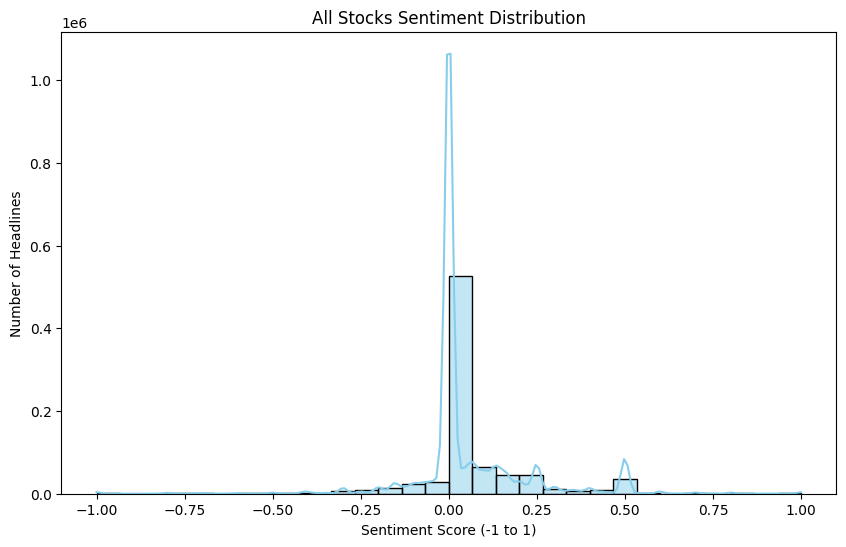

In [6]:
analyzer.plot_sentiment_distribution()

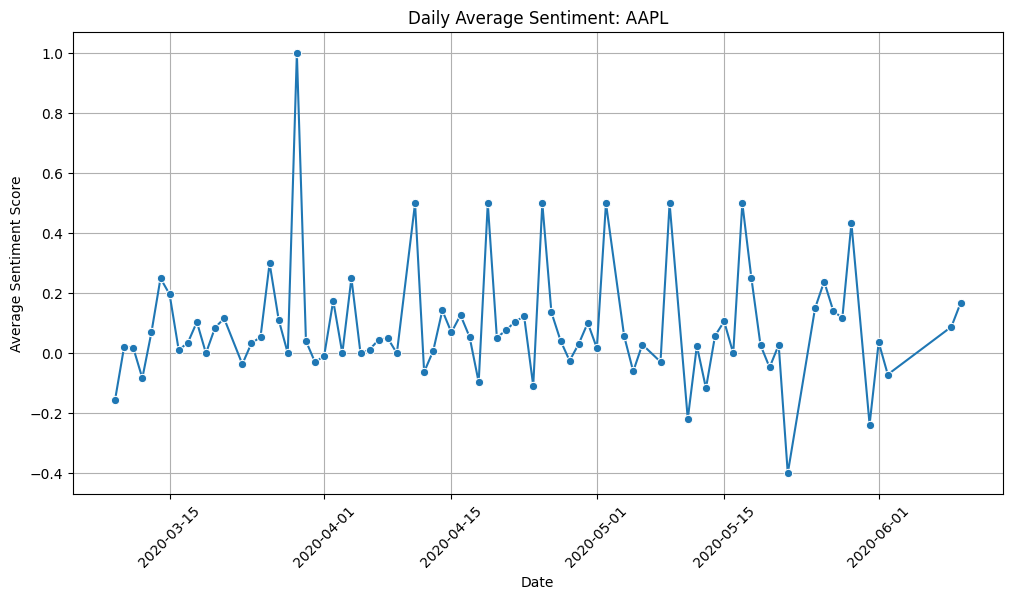

In [7]:
analyzer.plot_daily_sentiment("AAPL")

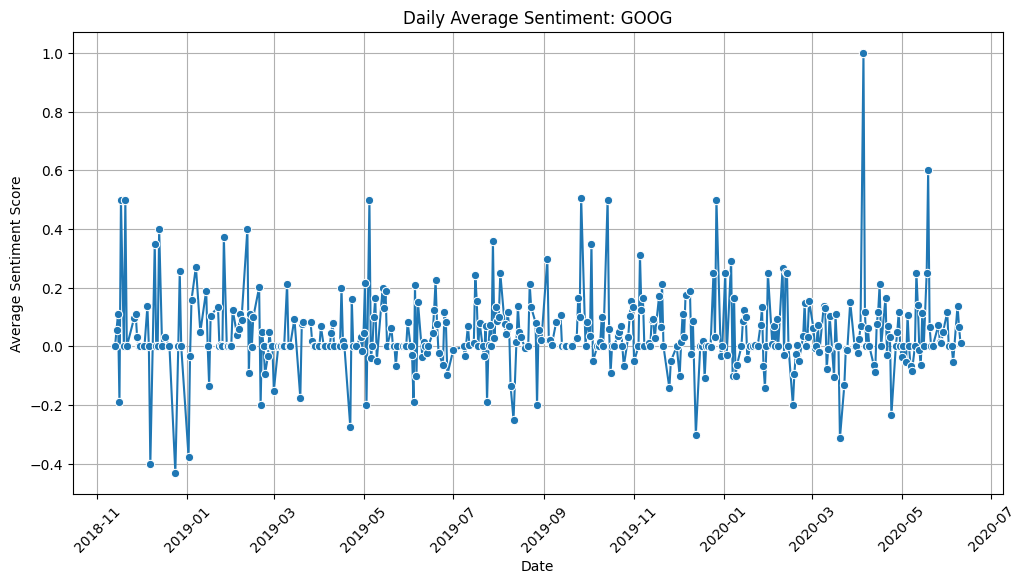

In [10]:
analyzer.plot_daily_sentiment("GOOG")

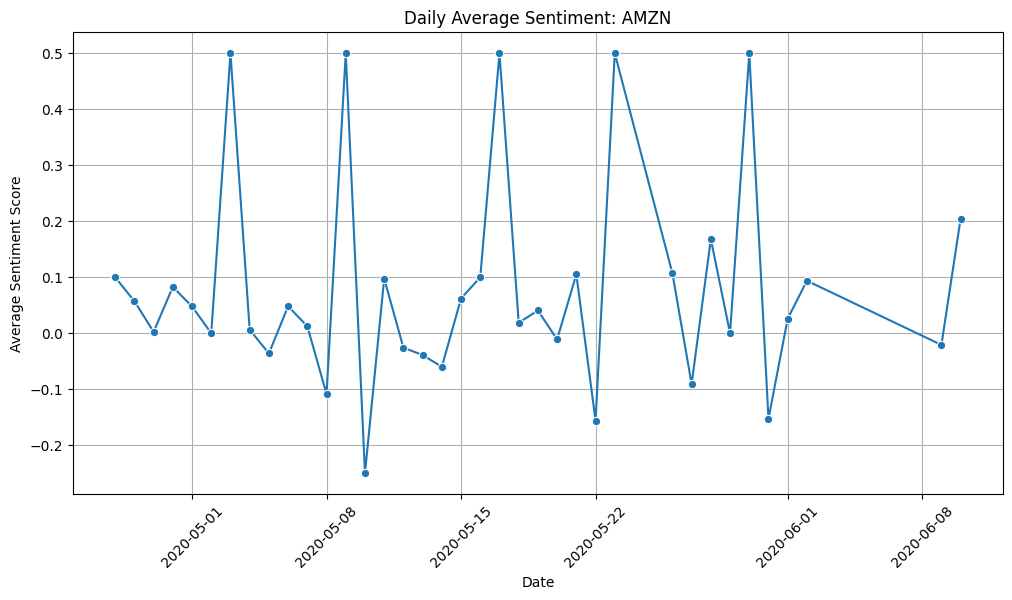

In [11]:
analyzer.plot_daily_sentiment("AMZN")

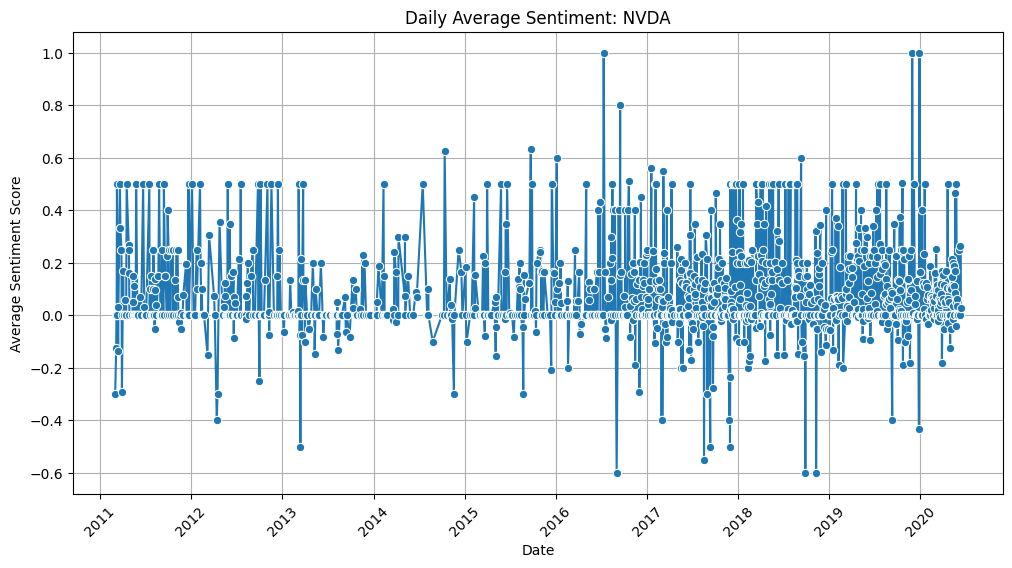

In [14]:
analyzer.plot_daily_sentiment("NVDA")

In [19]:
merged_df = analyzer.merge_data()
merged_df.head()


[3/4] Merging datasets...
 ✔ Merge completed: 1566 rows matched.


,Date,stock_symbol,sentiment_score,daily_return
0,2011-03-03,NVDA,-0.300,0.005783
1,2011-03-07,NVDA,-0.125,-0.013969
2,2011-03-08,NVDA,0.000,-0.044944
3,2011-03-09,NVDA,0.000,-0.020972
4,2011-03-10,NVDA,0.500,-0.063741


In [21]:
correlation_df = analyzer.calculate_correlation()
correlation_df


[4/4] Calculating correlation per stock symbol...
   - AAPL: 61 valid rows
   - AMZN: 28 valid rows
   - GOOG: 352 valid rows
   - NVDA: 1125 valid rows
 ✔ Correlation analysis completed.


,stock_symbol,correlation,p_value,count
0,AAPL,0.158145,0.223499,61
1,AMZN,-0.039763,0.840782,28
2,GOOG,0.056742,0.288398,352
3,NVDA,0.103821,0.000487,1125



Plotting correlation bar chart...


c:\Users\amare\Documents\KAIM\week-1\news-sentiment-week1\scripts\correlation_analysis.py:217: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Ticker", bbox_to_anchor=(1.05, 1), loc='upper left')


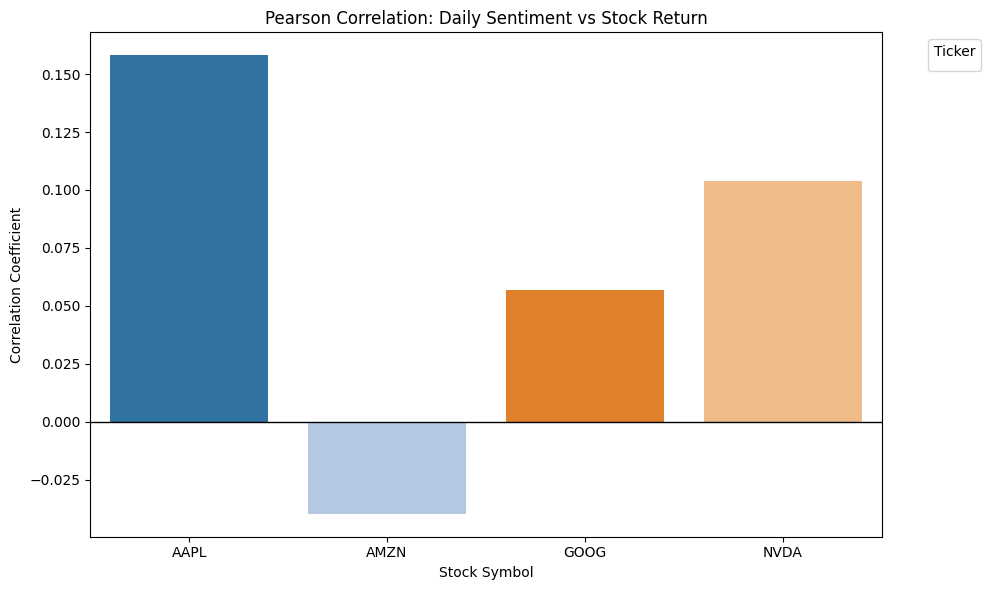

In [22]:
analyzer.plot_correlation_bar(correlation_df)



Plotting scatter plot (all stocks)...


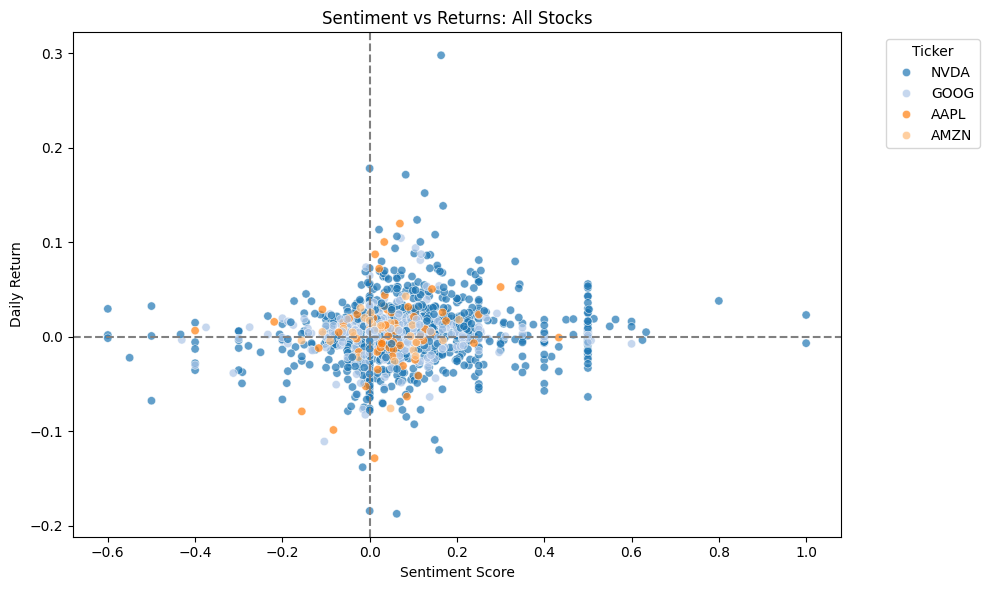

In [23]:
analyzer.plot_scatter()


Plotting scatter plot (AAPL)...


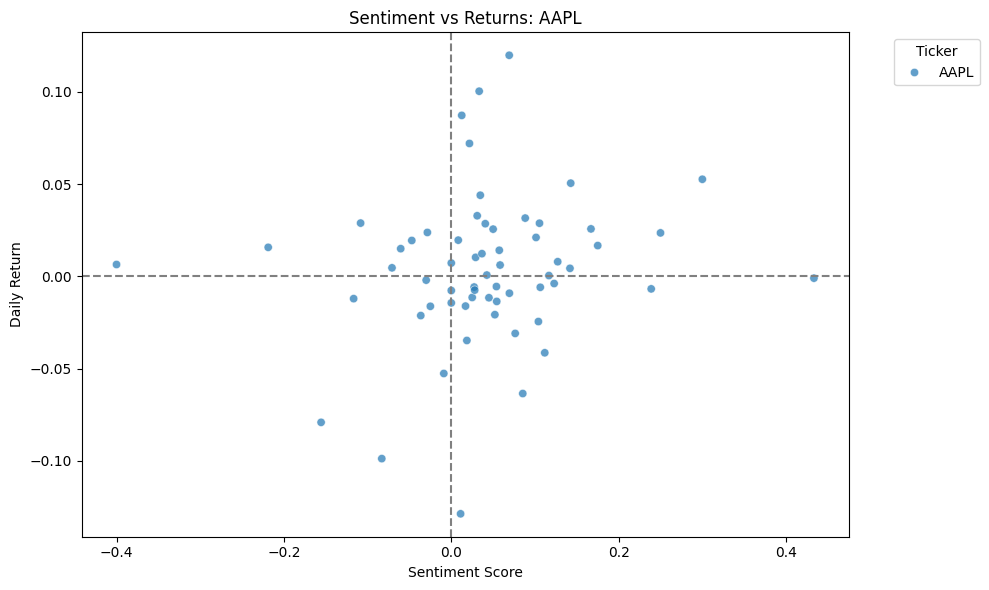

In [24]:
analyzer.plot_scatter(ticker="AAPL")



Plotting scatter plot (GOOG)...


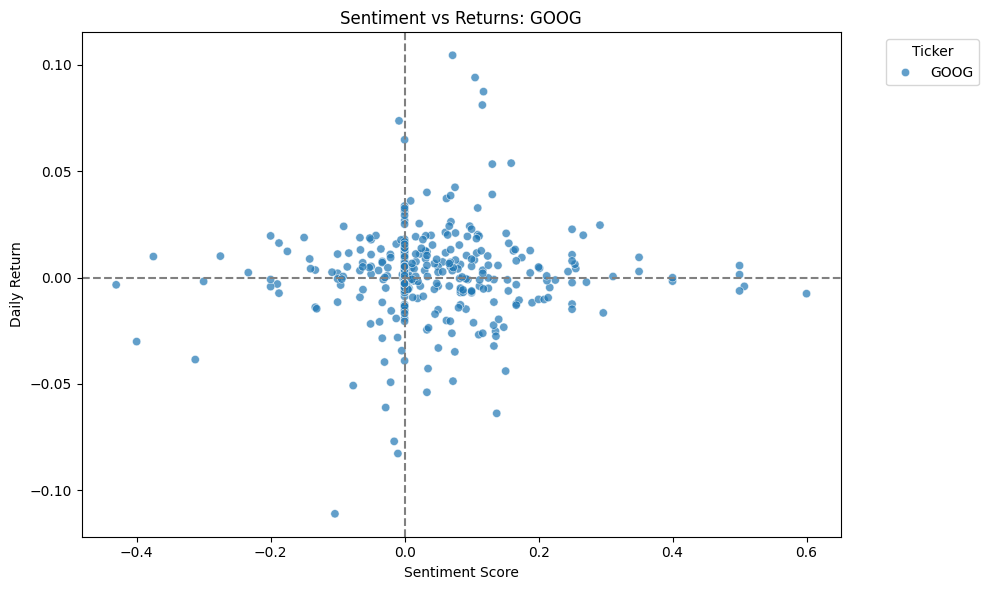

In [25]:
analyzer.plot_scatter(ticker="GOOG")


Plotting scatter plot (NVDA)...


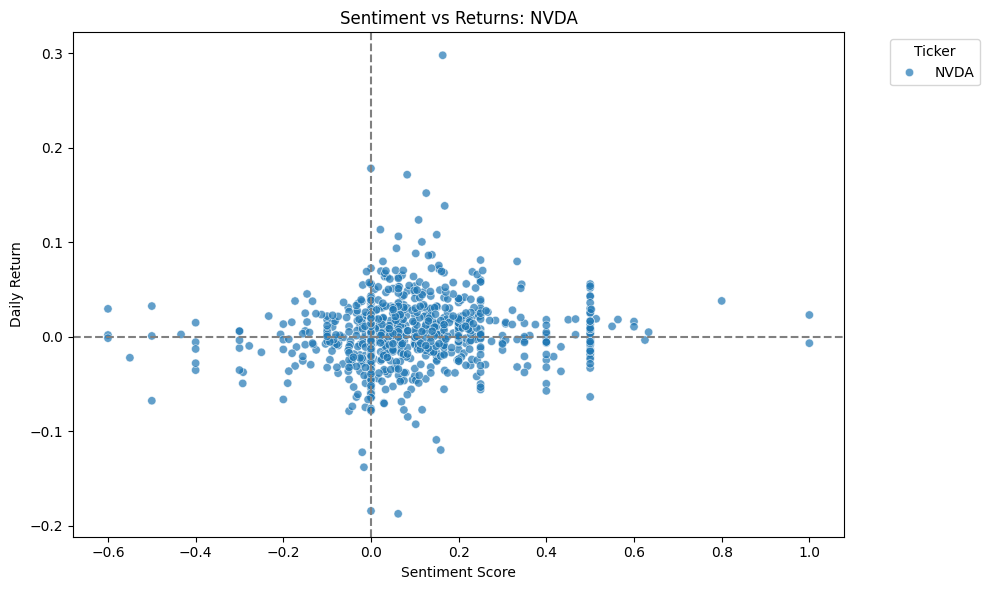

In [26]:
analyzer.plot_scatter(ticker="NVDA")


Plotting scatter plot (AMZN)...


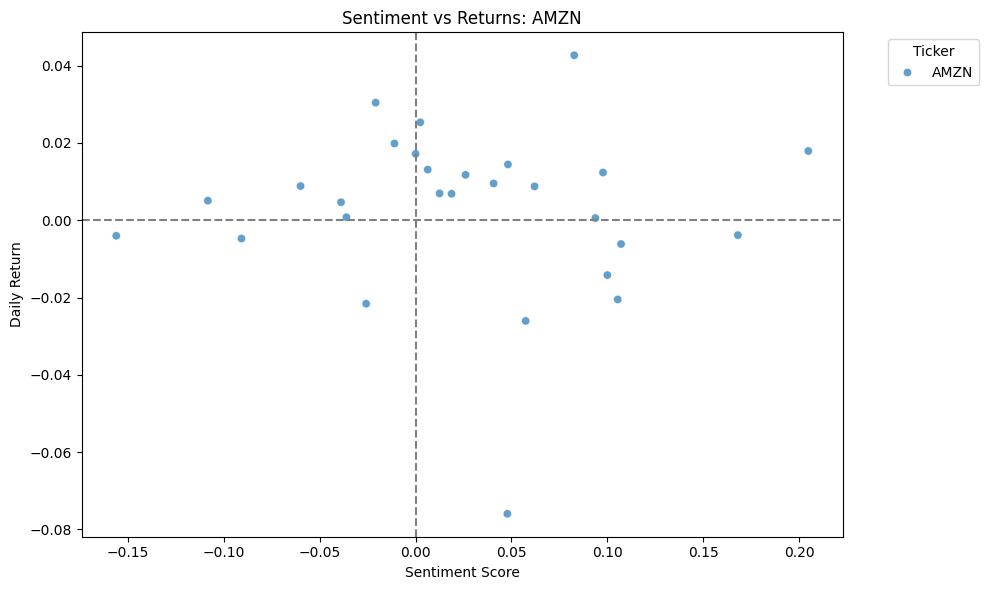

In [27]:
analyzer.plot_scatter(ticker="AMZN")


Plotting correlation heatmap...


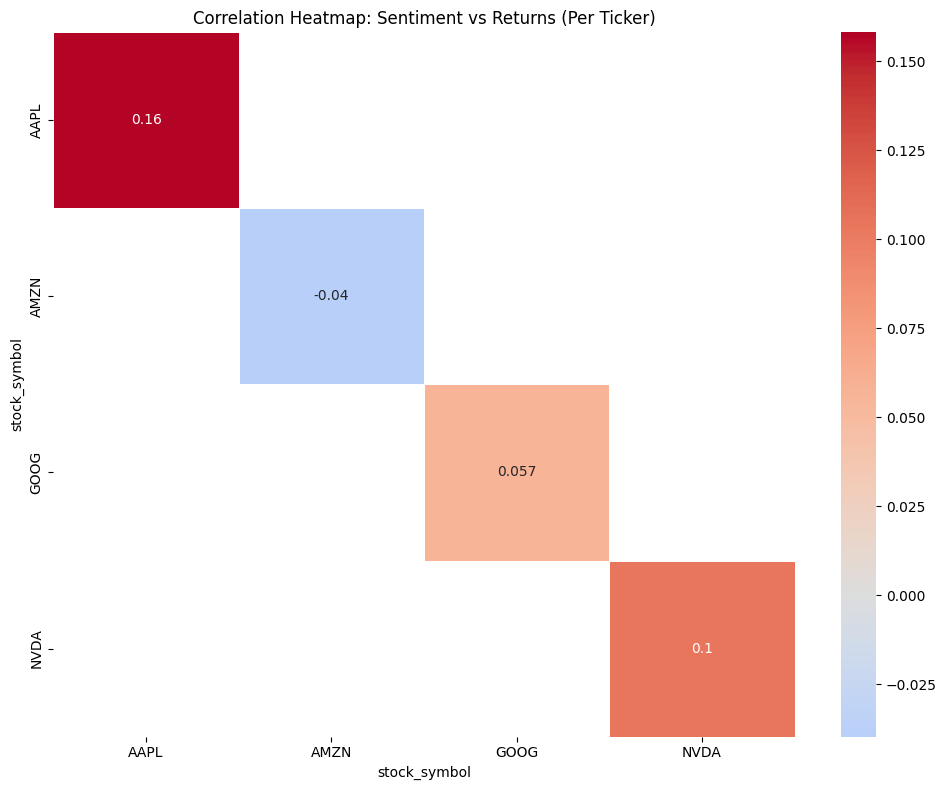

In [28]:
analyzer.plot_correlation_heatmap()


Plotting pairplot for all tickers...


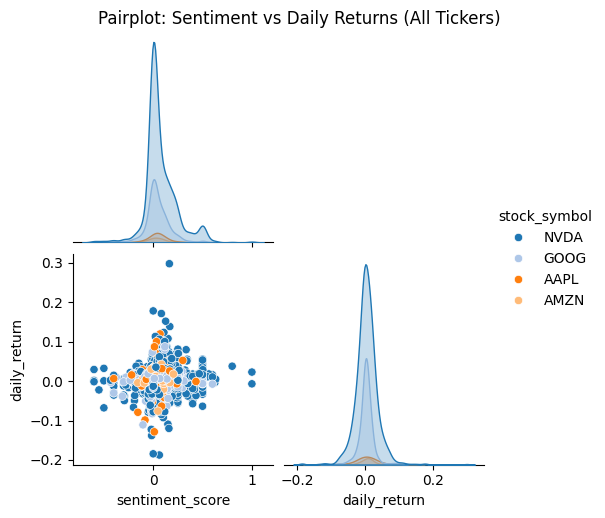

In [29]:
analyzer.plot_pairplot_all()